In [1]:
url="https://www.amazon.in/Test-Exclusive_2020_1178-Multi-3GB-Storage/product-reviews/B089MTJVLD/ref=cm_cr_arp_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1"

In [2]:
import requests 
import bs4
print(url)

https://www.amazon.in/Test-Exclusive_2020_1178-Multi-3GB-Storage/product-reviews/B089MTJVLD/ref=cm_cr_arp_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1


In [3]:
resp=requests.get(url)

In [4]:
resp.status_code

200

In [5]:
resp.headers['content-type']

'text/html;charset=UTF-8'

In [6]:
soup=bs4.BeautifulSoup(resp.content,'html5')

In [7]:
soup.find(attrs={"class":"a-row a-spacing-small review-data"})

<div class="a-row a-spacing-small review-data"><span class="a-size-base review-text review-text-content" data-hook="review-body">









  
  
    <span>
  Battery Issue.... Phone is Heating during Charging and During Running Application.
</span>
  
</span></div>

In [8]:
soup.find('div',attrs={"class":"a-row a-spacing-small review-data"}).text.strip()

'Battery Issue.... Phone is Heating during Charging and During Running Application.'

In [9]:
reviews = [tag.text.strip() for tag in soup.find_all(attrs={"class":"a-row a-spacing-small review-data"})]

In [10]:
len(reviews)

10

In [11]:
print(*reviews,sep='\n\n')

Battery Issue.... Phone is Heating during Charging and During Running Application.

Facing heating issue while using camera app and general usage in 60hz refresh rate if I use 120hz it gradually heating issue increase please solve this problem

My first time buying a OnePlus phone and I really like the finish of the one. Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything. The downside for me is that there is no place expand the memory.

Within 10 minutes of usage. It’s felt like over heat. I can’t experienced any mobile like this.

Iam OnePlus user since 4 years, I exchange my one Plus 7 pro mobile with OnePlus 9 R Not expected From One Plus, quality is not good, Look like cheep mobile, camera quality also not good, one Plus 7 pro superb mobile, totally iam disappointed with 9R.

I don't why no reviewer is speaking about it. It was heating with a normal usage.

After 5 days of usage writing this review

In [12]:
ratings=[tag.text.split()[0] for tag in soup.find_all('i',attrs={"data-hook":"review-star-rating"})]

In [13]:
import time
import tqdm

In [14]:
def get_all_reviews(start,end):
    url="https://www.amazon.in/Test-Exclusive_2020_1178-Multi-3GB-Storage/product-reviews/B089MTJVLD/ref=cm_cr_arp_d_paging_btm_next_{}?ie=UTF8&reviewerType=all_reviews&pageNumber={}"
    page=0
    err_pages=[]
    data={
        'reviews':[],
         'ratings':[]
         }
    for c in tqdm.tqdm(range(start,end)):
        resp=requests.get(url.format(c,c))
        if resp.status_code==200:
            soup=bs4.BeautifulSoup(resp.content,'html5')
            reviews = [tag.text.strip() for tag in soup.find_all(attrs={"class":"a-row a-spacing-small review-data"})]
            ratings=[tag.text.split()[0] for tag in soup.find_all('i',attrs={"data-hook":"review-star-rating"})]
            data['reviews'].extend(reviews)
            data['ratings'].extend(ratings)
            if len(reviews)<5:
                print('-'*100)
                print('successful'.center(50))
                print('-'*100)
                break
        elif resp.status_code==503:
            err_pages.append(c)
        else:
            print(f'Error!! {resp.status_code} {resp.reason}')
            break
        
        page+=1
    return data,page,err_pages

In [15]:
data,page,err_pages=get_all_reviews(1,100)

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [01:26<00:00,  1.14it/s]


In [16]:
page

99

In [17]:
len(data['reviews'])

810

In [18]:
len(err_pages)

18

In [19]:
def get_err_pages(nums):
    url="https://www.amazon.in/Test-Exclusive_2020_1178-Multi-3GB-Storage/product-reviews/B089MTJVLD/ref=cm_cr_arp_d_paging_btm_next_{}?ie=UTF8&reviewerType=all_reviews&pageNumber={}"
    page=0
    err_pages=[]
    data={
        'reviews':[],
         'ratings':[]
         }
    for c in tqdm.tqdm(nums):
        resp=requests.get(url.format(c,c))
        if resp.status_code==200:
            soup=bs4.BeautifulSoup(resp.content,'html5')
            reviews = [tag.text.strip() for tag in soup.find_all(attrs={"class":"a-row a-spacing-small review-data"})]
            ratings=[tag.text.split()[0] for tag in soup.find_all('i',attrs={"data-hook":"review-star-rating"})]
            data['reviews'].extend(reviews)
            data['ratings'].extend(ratings)
            if len(reviews)<5:
                print('-'*100)
                print('successful'.center(50))
                print('-'*100)
                break
        elif resp.status_code==503:
            err_pages.append(c)
        else:
            print(f'Error!! {resp.status_code} {resp.reason}')
            break
        
        page+=1
    return data,page,err_pages

In [20]:
d,p,e=get_err_pages(err_pages)

100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [00:17<00:00,  1.04it/s]


In [23]:
len(d['reviews'])

180

In [24]:
data['reviews'].extend(d['reviews'])
data['ratings'].extend(d['ratings'])

In [25]:
print(len(data['reviews']))
print(len(data['ratings']))

990
990


In [26]:
import pandas as pd

In [28]:
df=pd.DataFrame(data)

In [29]:
len(df)

990

In [32]:
df.head(20)

,reviews,ratings
0,Battery Issue.... Phone is Heating during Char...,1.0
1,Facing heating issue while using camera app an...,1.0
2,My first time buying a OnePlus phone and I rea...,5.0
3,Within 10 minutes of usage. It’s felt like ove...,1.0
4,"Iam OnePlus user since 4 years, I exchange my ...",2.0
5,I don't why no reviewer is speaking about it. ...,1.0
6,After 5 days of usage writing this review.1. B...,5.0
7,I am writing down this after using for a coupl...,4.0
8,Writing after 4 Days of use1. Heating Issues -...,3.0
9,I have recieved this new phone yesterday. Sinc...,3.0


In [33]:
df.tail(20)

,reviews,ratings
970,Where is call recording one plus 9r,5.0
971,Battery issue is there. Camera quality is not ...,1.0
972,Supreb,5.0
973,Battery life not that good but other than that...,4.0
974,Nice product,5.0
975,To good cell phone like another at this money ...,5.0
976,Great quality with next level performance,5.0
977,Some heating issues while charging and while r...,4.0
978,The refresh is very smooth and the camera is o...,5.0
979,Phone is excellent,5.0


In [34]:
len(df['reviews'].unique())

967

In [36]:
df.shape

(990, 2)

In [38]:
df['ratings'].value_counts()

5.0    459
4.0    264
1.0    118
3.0    101
2.0     48
Name: ratings, dtype: int64

<AxesSubplot:>

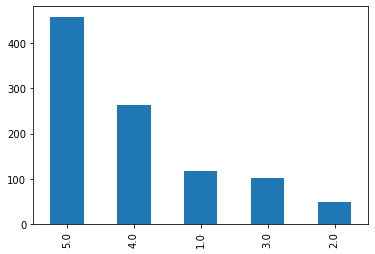

In [40]:
df['ratings'].value_counts().plot(kind='bar')